## Install packages

In [10]:
!pip install Sastrawi scikit-learn pandas nltk wordcloud plotly

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.9 MB 9.6 MB/s eta 0:00:01
   ---------------------- ----------------- 5.5/9.9 MB 15.6 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 17.4 MB/s  0:00:00

   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   --------

## Import Packages

In [11]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
import nltk
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
nltk.download('punkt')

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS
from transformers import pipeline
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import plotly.graph_objects as go

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\haxor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Load Dataset
Dataset yang diload adalah dataset hasil scrapping dari Serper API (Google News)

In [13]:
df = pd.read_csv('combined_data.csv')
df.head()

,title,link,snippet,date_clean,full_content
0,"Coretax Beroperasi, Pengusaha RI Kena Pajak Ta...",https://www.cnbcindonesia.com/news/20251126152...,NaN,11-2025,"Coretax Beroperasi, Pengusaha RI Kena Pajak Ta..."
1,Coretax dan Tantangan Modernisasi Pajak: Kemud...,http://ikpi.or.id/coretax-dan-tantangan-modern...,"Coretax menjanjikan banyak hal, yaitu proses p...",11-2025,Coretax dan Tantangan Modernisasi Pajak: Kemud...
2,Usut Dugaan Korupsi Pembayaran Pajak Periode 2...,https://www.viva.co.id/berita/nasional/1863770...,Kejagung tengah melakukan penyidikan kasus dug...,11-2025,Usut Dugaan Korupsi Pembayaran Pajak Periode 2...
3,Dirjen Pajak Suryo Utomo ikut disoroti soal mo...,https://www.bbc.com/indonesia/articles/c0jl4yx...,Dirjen Pajak Suryo Utomo ikut disoroti soal mo...,03-2023,Dirjen Pajak Suryo Utomo ikut disoroti soal mo...
4,Wajib Pajak Kesulitan Menerbitkan Faktur Pajak...,https://nasional.kontan.co.id/news/wajib-pajak...,Direktur Jenderal Pajak Suryo Utomo mengatakan...,01-2025,Wajib Pajak Kesulitan Menerbitkan Faktur Pajak...


In [18]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function to 'full_content'
df['cleaned_full_content'] = df['full_content'].fillna('').apply(clean_text)

df.to_csv('combined_data_cleaned.csv')

# Initialize Sastrawi stemmer and stop word remover
factory = StemmerFactory()
stemmer = factory.create_stemmer()

stopword_factory = StopWordRemoverFactory()
stopwords_sastrawi = stopword_factory.get_stop_words()
dictionary = ArrayDictionary(stopwords_sastrawi)
stopword_remover = StopWordRemover(dictionary)


In [16]:
def preprocess_text(text):
    # Remove stopwords
    text = stopword_remover.remove(text)
    # Stemming
    text = stemmer.stem(text)
    return text

# Apply stop word removal and stemming to the cleaned content
df['processed_full_content'] = df['cleaned_full_content'].apply(preprocess_text)

In [ ]:
df.to_csv('combined_data_stemmed.csv')

### Preview Data Hasil Stemmed

In [21]:
df = pd.read_csv('combined_data_stemmed.csv')
df.head()

,Unnamed: 0,title,link,snippet,date_clean,full_content,cleaned_full_content,processed_full_content
0,0,"Coretax Beroperasi, Pengusaha RI Kena Pajak Ta...",https://www.cnbcindonesia.com/news/20251126152...,NaN,11-2025,"Coretax Beroperasi, Pengusaha RI Kena Pajak Ta...",coretax beroperasi pengusaha ri kena pajak tam...,coretax operasi usaha ri kena pajak tambah ban...
1,1,Coretax dan Tantangan Modernisasi Pajak: Kemud...,http://ikpi.or.id/coretax-dan-tantangan-modern...,"Coretax menjanjikan banyak hal, yaitu proses p...",11-2025,Coretax dan Tantangan Modernisasi Pajak: Kemud...,coretax dan tantangan modernisasi pajak kemuda...,coretax tantang modernisasi pajak mudah bingun...
2,2,Usut Dugaan Korupsi Pembayaran Pajak Periode 2...,https://www.viva.co.id/berita/nasional/1863770...,Kejagung tengah melakukan penyidikan kasus dug...,11-2025,Usut Dugaan Korupsi Pembayaran Pajak Periode 2...,usut dugaan korupsi pembayaran pajak periode s...,usut duga korupsi bayar pajak periode sri muly...
3,3,Dirjen Pajak Suryo Utomo ikut disoroti soal mo...,https://www.bbc.com/indonesia/articles/c0jl4yx...,Dirjen Pajak Suryo Utomo ikut disoroti soal mo...,03-2023,Dirjen Pajak Suryo Utomo ikut disoroti soal mo...,dirjen pajak suryo utomo ikut disoroti soal mo...,dirjen pajak suryo utomo ikut sorot soal moge ...
4,4,Wajib Pajak Kesulitan Menerbitkan Faktur Pajak...,https://nasional.kontan.co.id/news/wajib-pajak...,Direktur Jenderal Pajak Suryo Utomo mengatakan...,01-2025,Wajib Pajak Kesulitan Menerbitkan Faktur Pajak...,wajib pajak kesulitan menerbitkan faktur pajak...,wajib pajak sulit terbit faktur pajak coretax ...


In [23]:
df = df.dropna(subset=['processed_full_content'])
df = df[df['processed_full_content'].astype(str).str.strip() != '']

In [42]:
# Load classifier
classifier = pipeline("sentiment-analysis", 
                      model="w11wo/indonesian-roberta-base-sentiment-classifier")

def sentiment_classifier_long_text(text):
    # 1. Cek validitas teks
    if not isinstance(text, str) or not text.strip():
        return None

    # 2. Pecah teks menjadi potongan-potongan (chunks)
    # Kita ambil estimasi aman: 1 kata ~= 1.3 token. 
    # Batas 512 token ~= 350-400 kata. Kita pakai 300 kata biar aman.
    max_words = 300
    words = text.split()
    chunks = [' '.join(words[i:i + max_words]) for i in range(0, len(words), max_words)]

    # 3. Prediksi setiap potongan
    results = []
    for chunk in chunks:
        # Tetap pakai truncation jaga-jaga ada kata yang sangat panjang
        res = classifier(chunk, truncation=True, max_length=512)[0]
        results.append(res['label'])

    # 4. Voting / Aggregasi Hasil
    # Jika mayoritas potongan bilang "Positive", maka hasil akhir "Positive"
    if not results:
        return None
        
    final_sentiment = max(set(results), key=results.count)
    return final_sentiment

# Jalankan fungsi
df['sentiment'] = df['processed_full_content'].apply(sentiment_classifier_long_text)

Device set to use cpu


In [43]:
df.to_csv('combined_data_sentiment.csv', index=False)

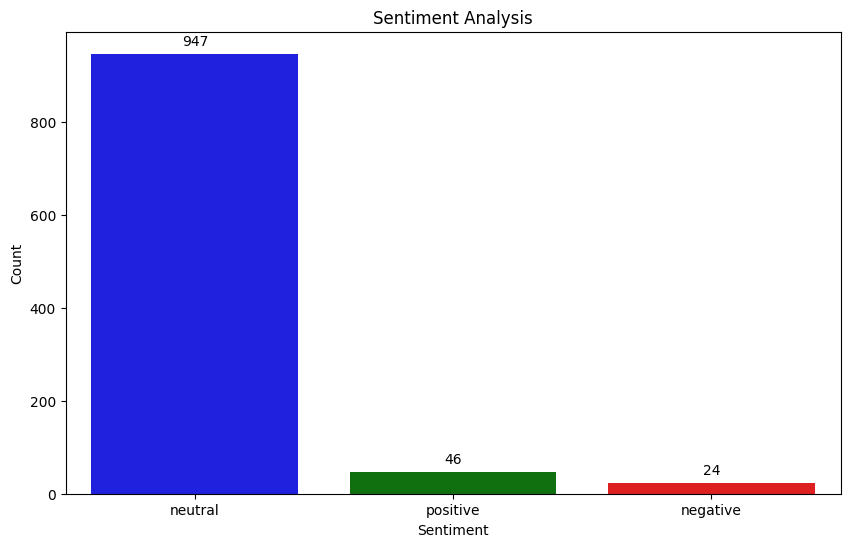

In [44]:
# sentiment analysis bar chart
# pallete set
palette_colors = {'negative': 'red', 'positive': 'green', 'neutral': 'blue'}
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='sentiment', data=df, palette=palette_colors, hue='sentiment')
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')
plt.show()

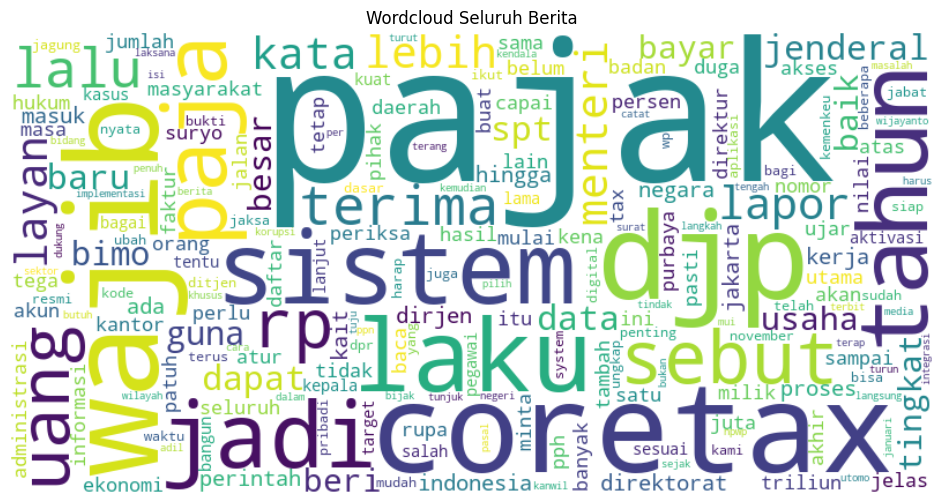

In [55]:
# Gabungkan semua teks
all_text = ' '.join(df['processed_full_content'].astype(str))

wc = WordCloud(width=800,
               height=400,
               background_color='white',
               collocations=False).generate(all_text)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Seluruh Berita')
plt.show()

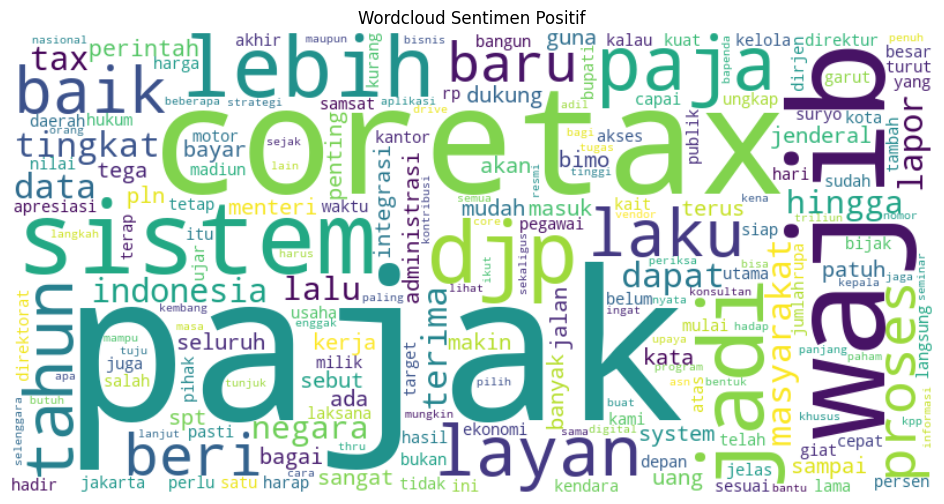

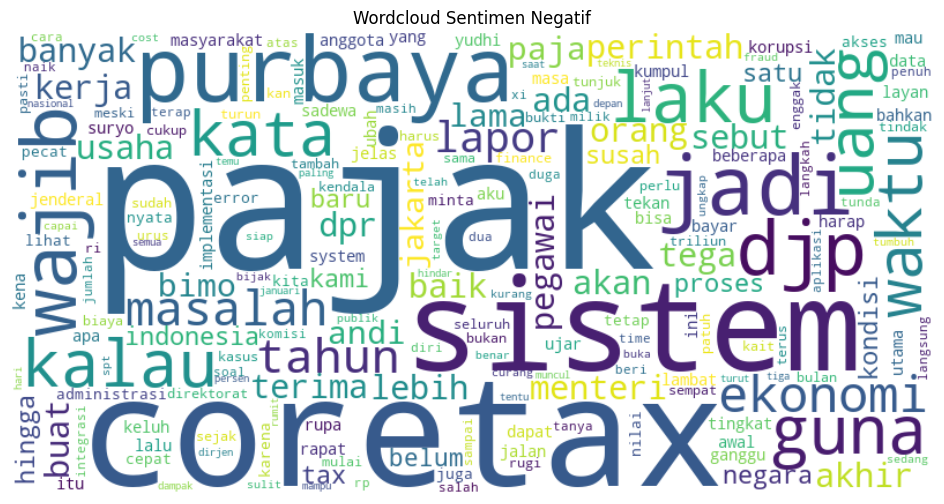

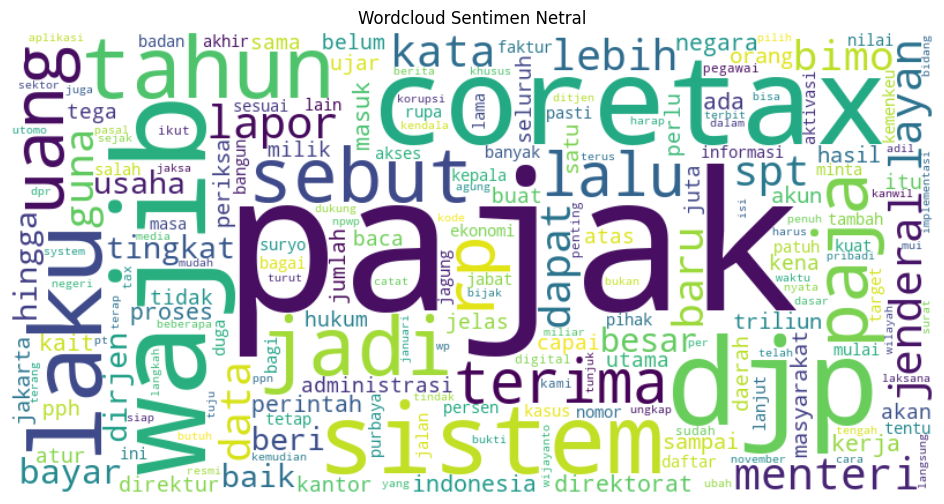

In [56]:
def plot_wordcloud_by_sentiment(label, title):
    text = ' '.join(
        df[df['sentiment'] == label]['processed_full_content'].astype(str)
    )
    if not text.strip():
        print(f"Tidak ada teks untuk label: {label}")
        return
    
    wc = WordCloud(width=800,
                   height=400,
                   background_color='white',
                   collocations=False).generate(text)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_wordcloud_by_sentiment('positive', 'Wordcloud Sentimen Positif')
plot_wordcloud_by_sentiment('negative', 'Wordcloud Sentimen Negatif')
plot_wordcloud_by_sentiment('neutral',  'Wordcloud Sentimen Netral')


## Training Data

In [45]:
X = df['processed_full_content']
y = df['sentiment']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
cvec = CountVectorizer()
tvec = TfidfVectorizer()
hvec = HashingVectorizer()

### Naive Bayes

In [48]:
clf_nb = MultinomialNB()
model_nb = Pipeline([('vectorizer', tvec), ('classifier', clf_nb)])
model_nb.fit(x_train, y_train)
result_nb = model_nb.predict(x_test)

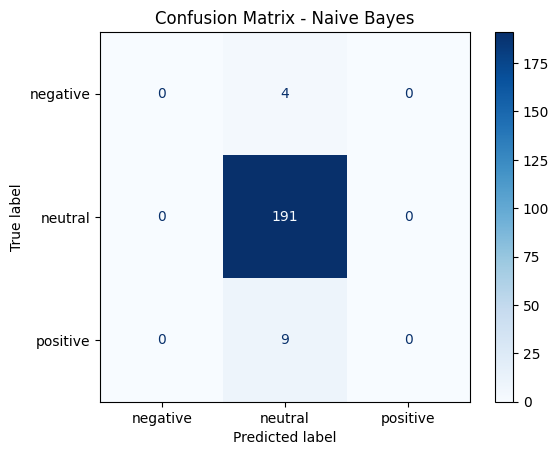

In [49]:
# confusion matrix
cm = confusion_matrix(y_test, result_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_nb.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

In [50]:
matrix = classification_report(y_test, result_nb)
print('Classification Report')
print(matrix)

Classification Report
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         4
     neutral       0.94      1.00      0.97       191
    positive       0.00      0.00      0.00         9

    accuracy                           0.94       204
   macro avg       0.31      0.33      0.32       204
weighted avg       0.88      0.94      0.91       204



f:\Dit IP\pandora-project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
f:\Dit IP\pandora-project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
f:\Dit IP\pandora-project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


### SVM

In [51]:
clf_svm = SVC(kernel='rbf')
model_svm = Pipeline([('vectorizer', tvec), ('classifier', clf_svm)])
model_svm.fit(x_train, y_train)
result_svm = model_svm.predict(x_test)

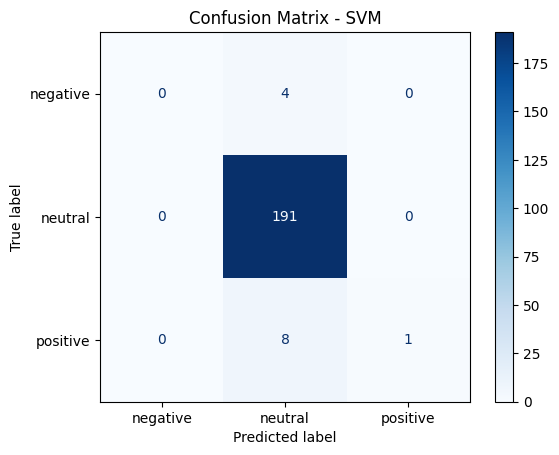

In [52]:
# confusion matrix
cm = confusion_matrix(y_test, result_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_svm.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.show()

In [54]:
matrix = classification_report(y_test, result_svm)
print('Classification Report')
print(matrix)

Classification Report
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         4
     neutral       0.94      1.00      0.97       191
    positive       1.00      0.11      0.20         9

    accuracy                           0.94       204
   macro avg       0.65      0.37      0.39       204
weighted avg       0.93      0.94      0.92       204



f:\Dit IP\pandora-project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
f:\Dit IP\pandora-project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
f:\Dit IP\pandora-project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


## Testing Model

In [57]:
import pandas as pd

# Contoh berita uji
test_samples = [
    {
        "label_manual": "positive",
        "full_content": """
Direktorat Jenderal Pajak berhasil melampaui target penerimaan negara tahun 2025
berkat peningkatan kepatuhan wajib pajak dan perbaikan layanan digital.
Pelaku usaha mengapresiasi proses pelaporan yang dinilai semakin sederhana
dan transparan.
"""
    },
    {
        "label_manual": "negative",
        "full_content": """
Sejumlah pengamat menilai kebijakan pengetatan pemeriksaan pajak yang dilakukan
Direktorat Jenderal Pajak menimbulkan kekhawatiran di kalangan pelaku usaha.
Mereka mengeluhkan prosedur yang dianggap memberatkan dan berpotensi
menghambat aktivitas bisnis.
"""
    },
    {
        "label_manual": "neutral",
        "full_content": """
Direktorat Jenderal Pajak mengumumkan jadwal pelaporan Surat Pemberitahuan
Tahunan bagi wajib pajak orang pribadi dan badan. DJP juga menjelaskan tata
cara pelaporan melalui aplikasi daring serta membuka layanan bantuan di kantor
pajak dan call center.
"""
    }
]

df_test = pd.DataFrame(test_samples)
df_test


,label_manual,full_content
0,positive,\nDirektorat Jenderal Pajak berhasil melampaui...
1,negative,\nSejumlah pengamat menilai kebijakan pengetat...
2,neutral,\nDirektorat Jenderal Pajak mengumumkan jadwal...


In [58]:
def full_preprocess(text: str) -> str:
    text = clean_text(text)
    text = stopword_remover.remove(text)
    text = stemmer.stem(text)
    return text

# Terapkan preprocessing
df_test['processed_full_content'] = df_test['full_content'].astype(str).apply(full_preprocess)

# Prediksi dengan model Naive Bayes
df_test['pred_nb'] = model_nb.predict(df_test['processed_full_content'])

# Prediksi dengan model SVM
df_test['pred_svm'] = model_svm.predict(df_test['processed_full_content'])

df_test[['label_manual', 'pred_nb', 'pred_svm']]

,label_manual,pred_nb,pred_svm
0,positive,neutral,neutral
1,negative,neutral,neutral
2,neutral,neutral,neutral


In [59]:
df_test.to_csv('testing_manual_results.csv', index=False)
print("Hasil testing disimpan ke testing_manual_results.csv")

Hasil testing disimpan ke testing_manual_results.csv
